In [1]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk

import warnings
warnings.filterwarnings("ignore")

In [2]:
sms = pd.read_csv("spam_mail.csv")

In [3]:
sms.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms.shape

(5572, 2)

<b>EDA<b>

In [5]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
sms.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
sms.duplicated().sum()

415

In [8]:
sms = sms.drop_duplicates(keep = "first")

In [9]:
sms.shape

(5157, 2)

In [10]:
sms.describe()

,Category,Message
count,5157,5157
unique,2,5157
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [11]:
sms["Category"].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

In [12]:
encoder = LabelEncoder()

sms["Category"] = encoder.fit_transform(sms["Category"])

In [13]:
sms.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
sms["Length"] = sms["Message"].apply(len)

In [15]:
sms.head()

,Category,Message,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


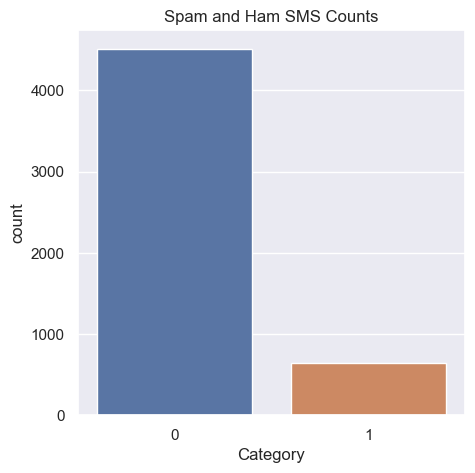

In [16]:
sns.set()
plt.figure(figsize = (5,5))
sns.countplot(data = sms, x = "Category")
plt.title("Spam and Ham SMS Counts")
plt.show()

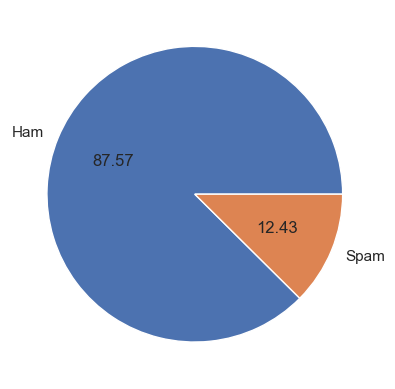

In [17]:
plt.pie(sms["Category"].value_counts(), labels = ["Ham", "Spam"], autopct = "%0.2f")
plt.show()

<Axes: ylabel='Frequency'>

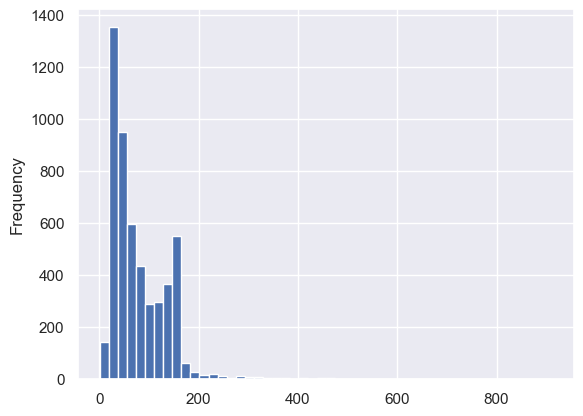

In [18]:
sms["Length"].plot(kind = "hist", bins = 50)

In [19]:
sms["Number_of_Words"] = sms["Message"].apply(lambda x:len(nltk.word_tokenize(x)))

In [20]:
sms.head()

,Category,Message,Length,Number_of_Words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
sms["Number_of_Sentences"] = sms["Message"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
sms.head()

,Category,Message,Length,Number_of_Words,Number_of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
sms[["Length", "Number_of_Words", "Number_of_Sentences"]].describe()

,Length,Number_of_Words,Number_of_Sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
sms[sms["Category"] == 0][["Length", "Number_of_Words", "Number_of_Sentences"]].describe()

,Length,Number_of_Words,Number_of_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
sms[sms["Category"] == 1][["Length", "Number_of_Words", "Number_of_Sentences"]].describe()

,Length,Number_of_Words,Number_of_Sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='Length', ylabel='Count'>

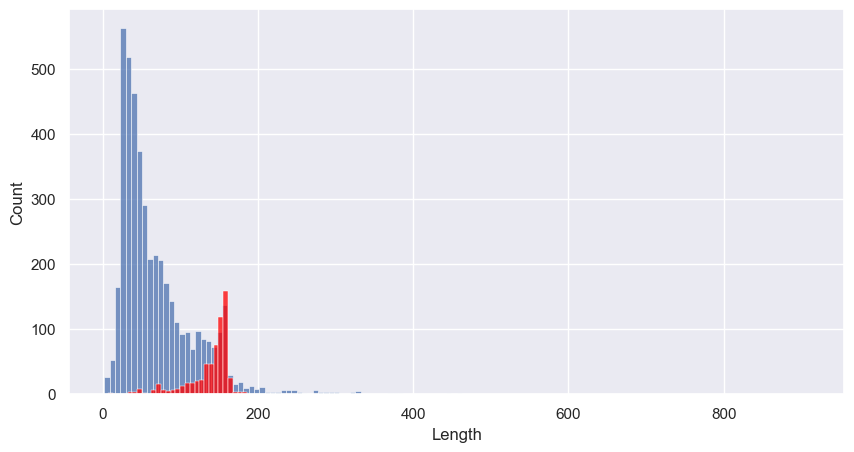

In [26]:
plt.figure(figsize = (10, 5))
sns.histplot(sms[sms["Category"] == 0]["Length"])
sns.histplot(sms[sms["Category"] == 1]["Length"], color = "red")

<Axes: xlabel='Number_of_Words', ylabel='Count'>

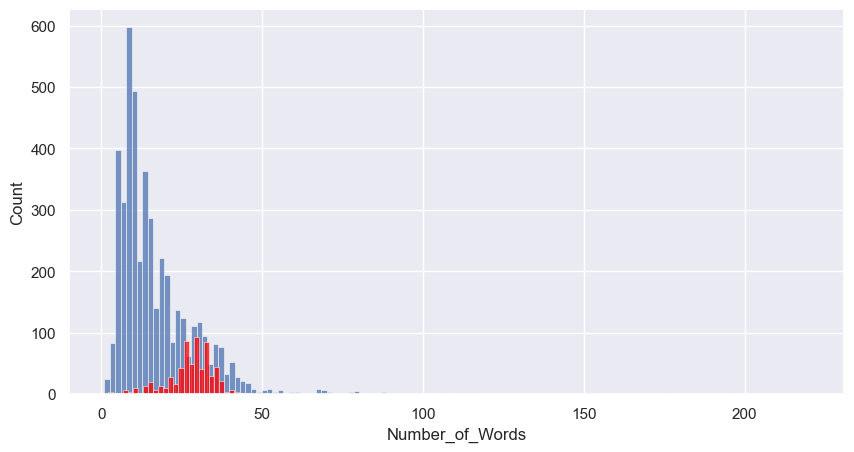

In [27]:
plt.figure(figsize = (10, 5))
sns.histplot(sms[sms["Category"] == 0]["Number_of_Words"])
sns.histplot(sms[sms["Category"] == 1]["Number_of_Words"], color = "red")

<Axes: xlabel='Number_of_Sentences', ylabel='Count'>

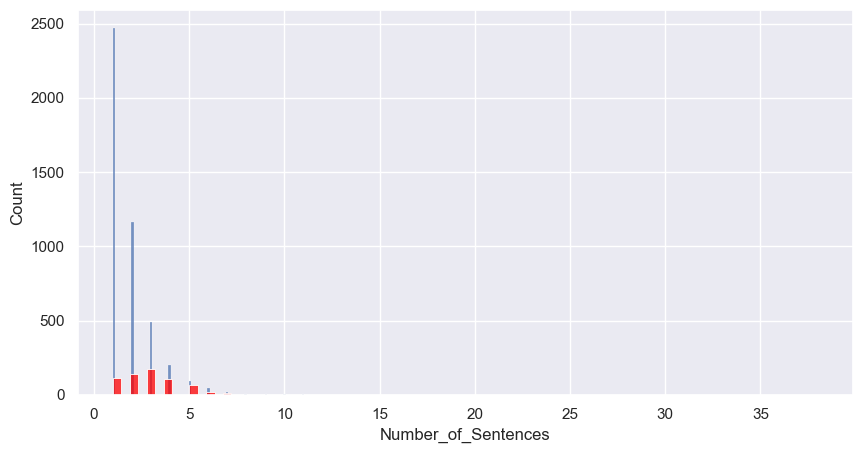

In [28]:
plt.figure(figsize = (10, 5))
sns.histplot(sms[sms["Category"] == 0]["Number_of_Sentences"])
sns.histplot(sms[sms["Category"] == 1]["Number_of_Sentences"], color = "red")

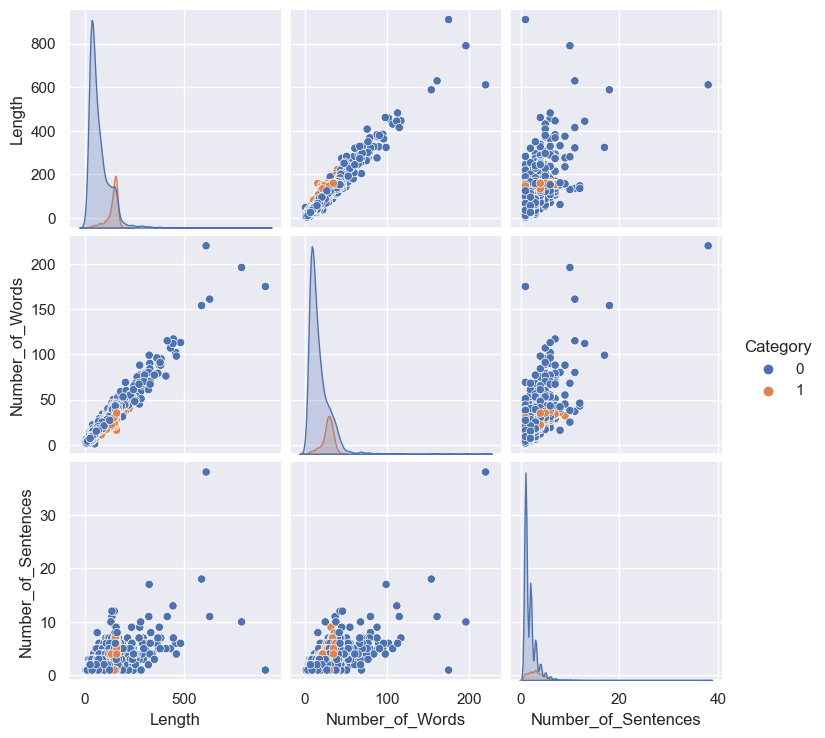

In [29]:
sns.pairplot(data = sms, hue = "Category")

<Axes: >

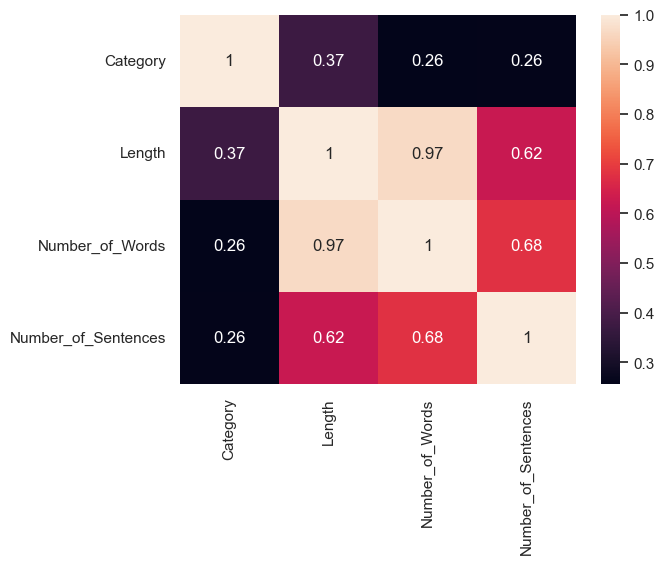

In [30]:
sns.heatmap(sms.corr(), annot = True)

<b>Data Preprocessing</b>

In [31]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [34]:
def transform_message(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    
    y = []
    for i in message:
        if i.isalnum():
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for i in message:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
            
    message = y[:]
    y.clear()
    
    for i in message:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [35]:
transform_message("Wait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us")

'wait still clear sure sarcast x want live us'

In [36]:
sms["Transformed_Message"] = sms["Message"].apply(transform_message)

In [37]:
sms.head()

,Category,Message,Length,Number_of_Words,Number_of_Sentences,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
from wordcloud import WordCloud

In [39]:
word_cloud = WordCloud(height = 500, width = 500, min_font_size = 10, background_color = "white")

In [40]:
spam_wordcloud = word_cloud.generate(sms[sms["Category"] == 1]["Transformed_Message"].str.cat(sep = " "))

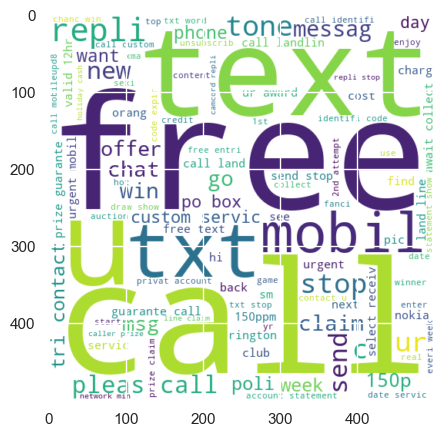

In [41]:
plt.figure(figsize = (8,5))
plt.imshow(spam_wordcloud, interpolation = "bilinear")

In [42]:
ham_wordcloud = word_cloud.generate(sms[sms["Category"] == 0]["Transformed_Message"].str.cat(sep = " "))

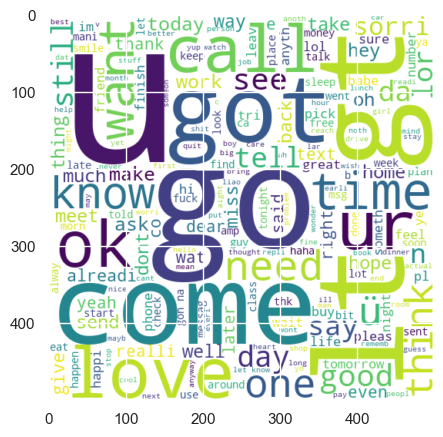

In [43]:
plt.figure(figsize = (8,5))
plt.imshow(spam_wordcloud, interpolation = "bilinear")

In [44]:
spam_corpus = []

for msg in sms[sms["Category"] == 1]["Transformed_Message"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [45]:
len(spam_corpus)

9781

In [46]:
from collections import Counter
Counter(spam_corpus).most_common(20)

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55)]

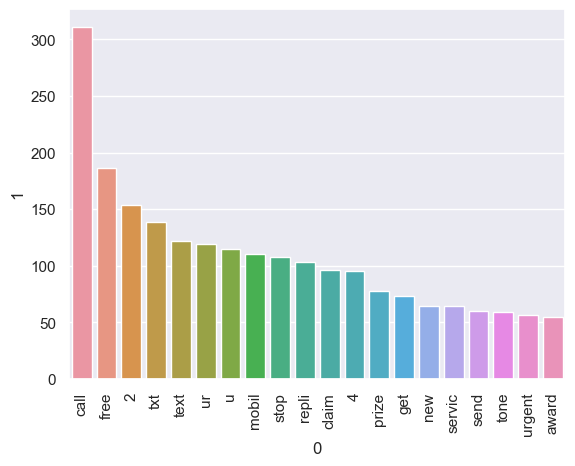

In [47]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(20))[0], 
            y = pd.DataFrame(Counter(spam_corpus).most_common(20))[1])

plt.xticks(rotation = "vertical")            
plt.show()

In [48]:
ham_corpus = []

for msg in sms[sms["Category"] == 0]["Transformed_Message"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [49]:
len(ham_corpus)

35940

In [50]:
Counter(ham_corpus).most_common(20)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 218),
 ('good', 215),
 ('want', 209),
 ('ur', 203),
 ('day', 195),
 ('ü', 173),
 ('need', 171)]

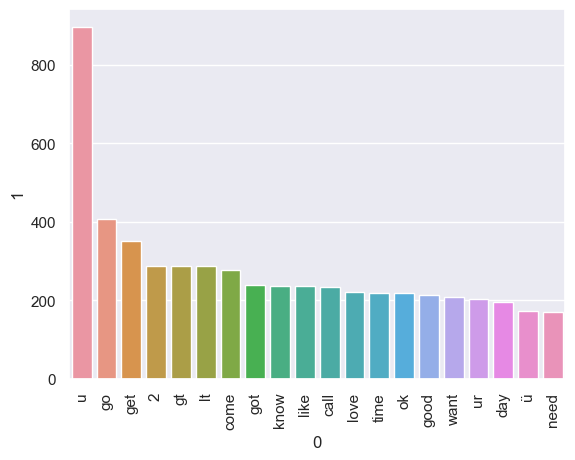

In [51]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(20))[0], 
            y = pd.DataFrame(Counter(ham_corpus).most_common(20))[1])

plt.xticks(rotation = "vertical")            
plt.show()

<b>Model Building</b>

In [52]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [53]:
#X = cv.fit_transform(mail["Transformed_Message"]).toarray()
X = tfidf.fit_transform(sms["Transformed_Message"]).toarray()

In [54]:
X.shape

(5157, 6781)

In [55]:
y = sms["Category"].values

In [56]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [59]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

Gaussian Naive Bayes

In [60]:
gnb = GaussianNB()

In [61]:
gnb.fit(X_train, y_train)
y_prediction1 = gnb.predict(X_test)
print("Accuracy score on Gaussian Model", accuracy_score(y_test, y_prediction1))
print("Confusion Matrix", confusion_matrix(y_test, y_prediction1))
print("Precision Score", precision_score(y_test, y_prediction1))

Accuracy score on Gaussian Model 0.8691860465116279
Confusion Matrix [[787 118]
 [ 17 110]]
Precision Score 0.4824561403508772


Multinomial Naive Bayes

In [62]:
mnb = MultinomialNB()

In [63]:
mnb.fit(X_train, y_train)
y_prediction2 = mnb.predict(X_test)
print("Accuracy score on Multinomial Model", accuracy_score(y_test, y_prediction2))
print("Confusion Matrix", confusion_matrix(y_test, y_prediction2))
print("Precision Score", precision_score(y_test, y_prediction2))

Accuracy score on Multinomial Model 0.9612403100775194
Confusion Matrix [[905   0]
 [ 40  87]]
Precision Score 1.0


Bernoulli Naive Bayes

In [64]:
bnb = BernoulliNB()

In [65]:
bnb.fit(X_train, y_train)
y_prediction3 = bnb.predict(X_test)
print("Accuracy score on Bernoulli Model", accuracy_score(y_test, y_prediction3))
print("Confusion Matrix", confusion_matrix(y_test, y_prediction3))
print("Precision Score", precision_score(y_test, y_prediction3))

Accuracy score on Bernoulli Model 0.9718992248062015
Confusion Matrix [[902   3]
 [ 26 101]]
Precision Score 0.9711538461538461


LogisticRegression

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lr_model = LogisticRegression(solver = "liblinear", penalty = "l1")

In [68]:
lr_model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [69]:
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [70]:
print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  0.9636363636363636


In [71]:
X_test_prediction = lr_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [72]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.9515503875968992


[[898   7]
 [ 43  84]]


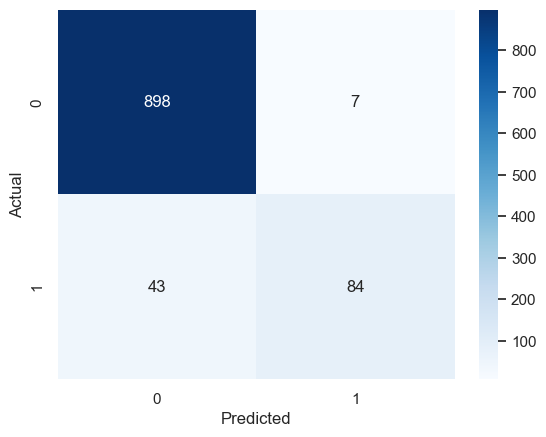

In [73]:
cm = confusion_matrix(y_test, X_test_prediction)
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [74]:
 print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       905
           1       0.92      0.66      0.77       127

    accuracy                           0.95      1032
   macro avg       0.94      0.83      0.87      1032
weighted avg       0.95      0.95      0.95      1032



RandomForestClassifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)

In [77]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=2)

In [78]:
X_train_prediction = rfc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [79]:
print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  0.9997575757575757


In [80]:
X_test_prediction = rfc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [81]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.9670542635658915


[[905   0]
 [ 34  93]]


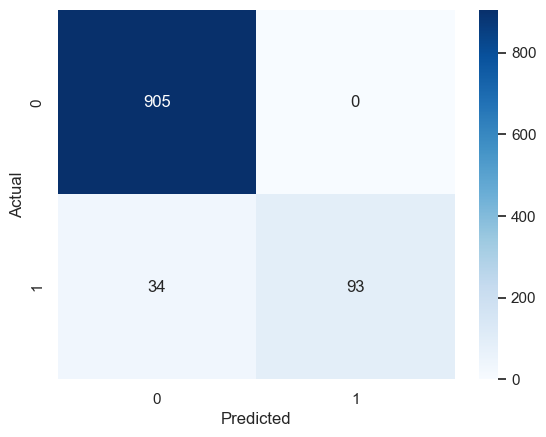

In [82]:
cm = confusion_matrix(y_test, X_test_prediction)
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [83]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       905
           1       1.00      0.73      0.85       127

    accuracy                           0.97      1032
   macro avg       0.98      0.87      0.91      1032
weighted avg       0.97      0.97      0.96      1032



Support Vector Classifier

In [84]:
from sklearn.svm import SVC

In [85]:
svc = SVC(kernel = "sigmoid", gamma = 1.0)

In [86]:
svc.fit(X_train, y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [87]:
X_train_prediction = svc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [88]:
print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  0.9878787878787879


In [89]:
X_test_prediction = svc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [90]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.9718992248062015


[[903   2]
 [ 27 100]]


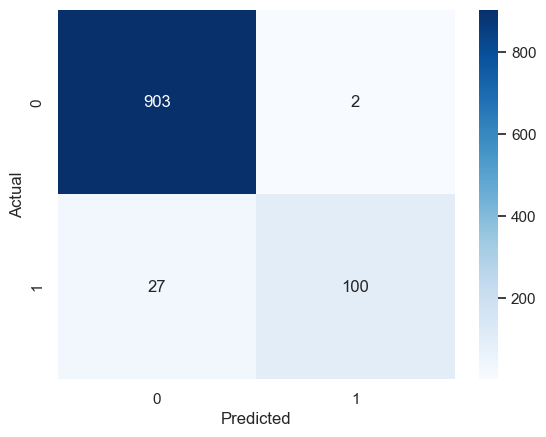

In [91]:
cm = confusion_matrix(y_test, X_test_prediction)
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [92]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       905
           1       0.98      0.79      0.87       127

    accuracy                           0.97      1032
   macro avg       0.98      0.89      0.93      1032
weighted avg       0.97      0.97      0.97      1032



Multinomial Naive Bayes

In [93]:
from sklearn.naive_bayes import MultinomialNB

In [94]:
mnb = MultinomialNB()

In [95]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [96]:
X_train_prediction = mnb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [97]:
print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  0.9684848484848485


In [98]:
X_test_prediction = mnb.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [99]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.9612403100775194


[[905   0]
 [ 40  87]]


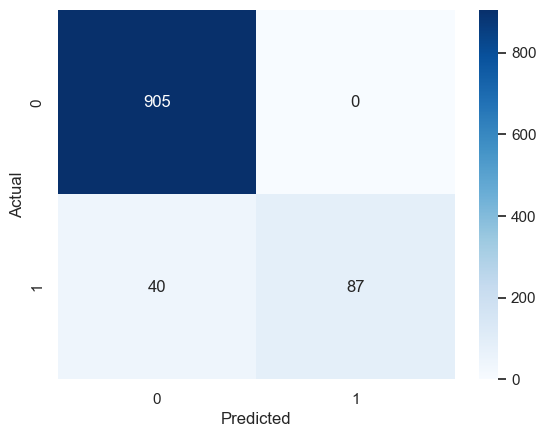

In [100]:
cm = confusion_matrix(y_test, X_test_prediction)
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [101]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       905
           1       1.00      0.69      0.81       127

    accuracy                           0.96      1032
   macro avg       0.98      0.84      0.90      1032
weighted avg       0.96      0.96      0.96      1032



DecisionTreeClassifier

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
dtc = DecisionTreeClassifier(max_depth = 5)

In [104]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [105]:
X_train_prediction = dtc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [106]:
print("Accuracy on Training Data: ", training_data_accuracy)

Accuracy on Training Data:  0.950060606060606


In [107]:
X_test_prediction = dtc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [108]:
print("Accuracy on Test Data: ", test_data_accuracy)

Accuracy on Test Data:  0.938953488372093


[[888  17]
 [ 46  81]]


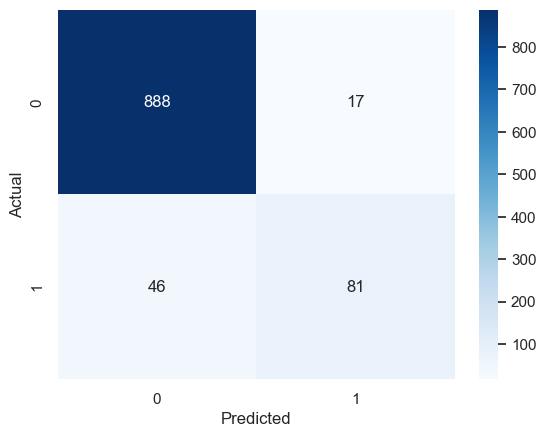

In [109]:
cm = confusion_matrix(y_test, X_test_prediction)
print(cm)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [110]:
print(classification_report(y_test, X_test_prediction))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       905
           1       0.83      0.64      0.72       127

    accuracy                           0.94      1032
   macro avg       0.89      0.81      0.84      1032
weighted avg       0.94      0.94      0.94      1032



In [111]:
input_mail = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]

mail_feature = tfidf.transform(input_mail)

prediction = mnb.predict(mail_feature)

print(prediction)

if prediction[0] == 0:
    print("It's a Ham Mail")
    
else:
    print("It's a Spam Mail")

[0]
It's a Ham Mail


In [112]:
input_mail = ["XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"]

mail_feature = tfidf.transform(input_mail)

prediction = mnb.predict(mail_feature)

print(prediction)

if prediction[0] == 0:
    print("It's a Ham Mail")
    
else:
    print("It's a Spam Mail")

[1]
It's a Spam Mail


In [113]:
import pickle
pickle.dump(tfidf,open("tfidf.pkl","wb"))
pickle.dump(mnb,open("mnb_model.pkl","wb"))